# Analysis

In [19]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("Set1", 8, .75)

figsize = (15, 10)

In [5]:
# load the dataset into memory
df = pd.read_csv("../dataset/processed.data.csv", encoding='utf-8')

print ("[info] %d rows & %d columns found dataset" % (df.shape[0], df.shape[1]))

# list out the columns
df.columns

[info] 325426 rows & 26 columns found dataset


Index(['bundleId', 'trackName', 'IsUniversal', 'advisories', 'fileSizeInMB',
       'contentAdvisoryRating', 'currentVersionReleaseDate', 'version',
       'subversion', 'artist', 'genres', 'price', 'description',
       'isVppDeviceBasedLicensingEnabled', 'primaryGenreName', 'releaseDate',
       'ageInDays', 'minimumOsVersion', 'averageUserRating', 'avgUserRatingCV',
       'userRatingCount', 'userRatingCountCV', 'hasUrl', 'sellerUrl',
       'sellerUrlDomain', 'releaseNotes'],
      dtype='object')

## Distribution by Genres and Primary Genre

#### Introduction

 - **genres**: _list of genres to which an app belongs to (1 or more per app)_
 - **primaryGenreName**: _the primary genre of the application (1 per app)_
 
### Genres

In [32]:
def generateGenreSummary(_df):

    # compute the distribution per genre
    genres = {}
    for genreString in _df.genres.values:
        gs = json.loads(genreString)
        for g in gs:
            if g not in genres:
                genres[g] = 0
            genres[g] = genres[g] + 1

    # create a dataframe from this distribution
    gdf = pd.DataFrame([[k,v] for k,v in genres.items()], columns=['genre', 'count'])
    gdf = gdf.sort_values(['count'], ascending=False)
    
    print ("\nTop 10 Genres by distribution")
    print (gdf.head(10))
    
    plt.figure(figsize=figsize)
    fx = sns.barplot(x='genre', y='count', data=gdf.head(20))
    fx.set_xticklabels(rotation=90, labels=gdf['genre'], size=14)
    plt.title("Distribution by genres")
    
    print ("\ndistribution of primary genre in percentage")
    print (_df.primaryGenreName.value_counts(normalize=True) * 100)
    
    _ct = pd.crosstab(_df.primaryGenreName, "count").sort_values(["count"], ascending=False)
    fx = _ct.plot(kind='bar', figsize=figsize)
    fx.set_xticklabels(rotation=90, labels=gdf['genre'], size=14)
    plt.title("distribution by primary genre name")


Top 10 Genres by distribution
               genre  count
39             Games  79645
14     Entertainment  75131
11         Lifestyle  47832
22         Education  45235
23          Business  43091
42         Utilities  40719
33      Productivity  27508
37            Sports  20509
47         Reference  18881
30  Health & Fitness  18617

distribution of primary genre in percentage
Games                     21.963519
Business                   9.546256
Education                  8.949500
Lifestyle                  6.593819
Entertainment              6.125509
Utilities                  5.890740
Finance                    3.736026
Health & Fitness           3.681636
Productivity               3.395549
Travel                     3.312888
Sports                     2.950594
Music                      2.941068
Medical                    2.849496
Photo & Video              2.705070
Reference                  2.458009
Food & Drink               2.186672
Social Networking          2.159323
News

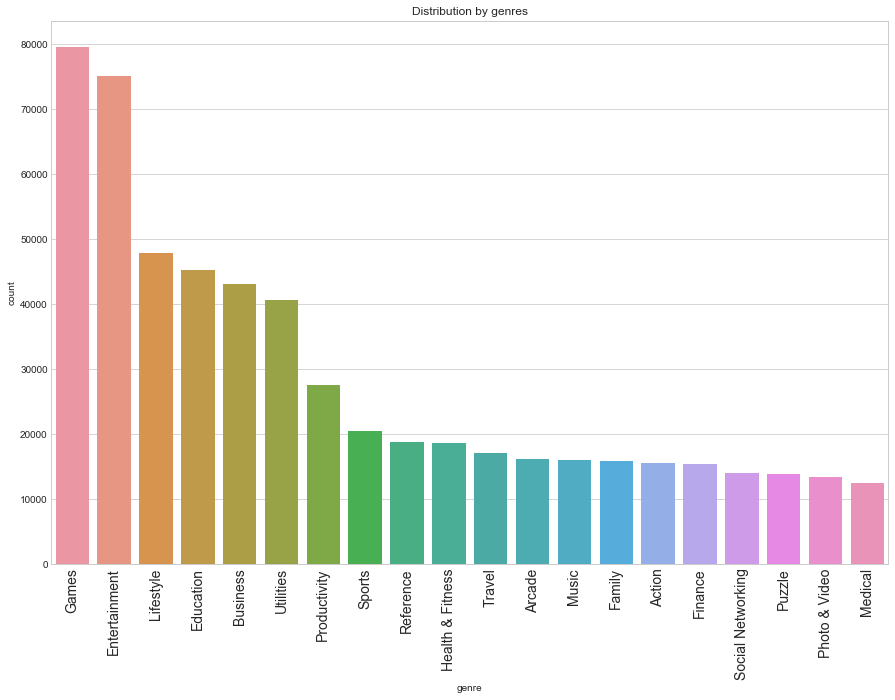

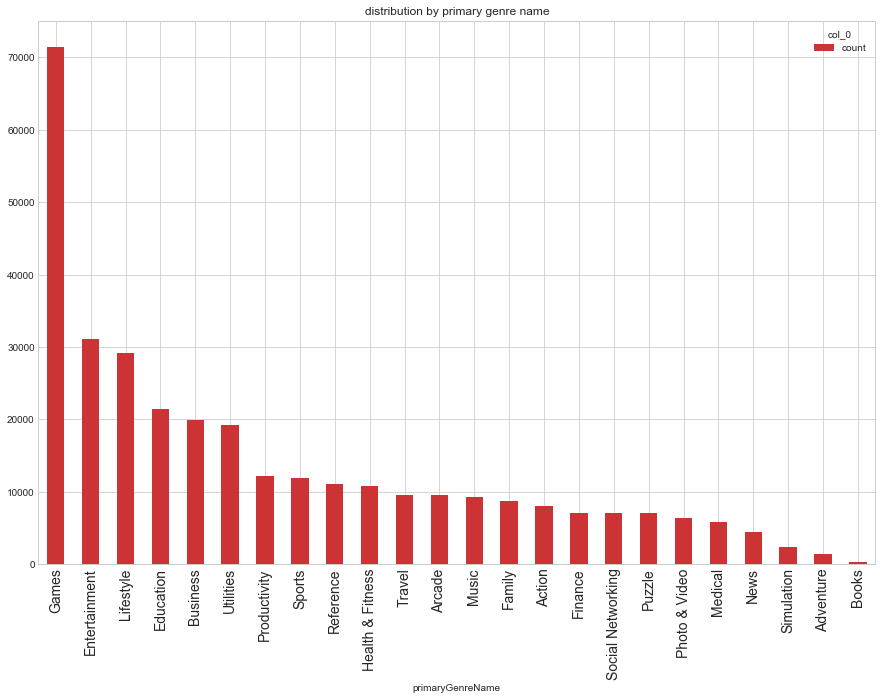

In [33]:
generateGenreSummary(df)

#### let's look at the paid apps


Top 10 Genres by distribution
               genre  count
50         Education   7852
40     Entertainment   7225
39             Games   7069
42         Utilities   6092
47         Reference   3831
11         Lifestyle   3550
27      Productivity   3525
36            Travel   2913
38        Navigation   2572
29  Health & Fitness   2463

distribution of primary genre in percentage
Games                15.733737
Education            14.197603
Utilities             7.983242
Stickers              5.501571
Entertainment         5.498662
Reference             5.102991
Travel                4.535669
Music                 4.209822
Productivity          4.201094
Medical               4.137088
Health & Fitness      4.113814
Photo & Video         3.889794
Navigation            3.793786
Lifestyle             3.412661
Book                  3.107180
Business              2.845339
Sports                2.743512
Finance               1.547771
Food & Drink          0.919353
Weather               0.826

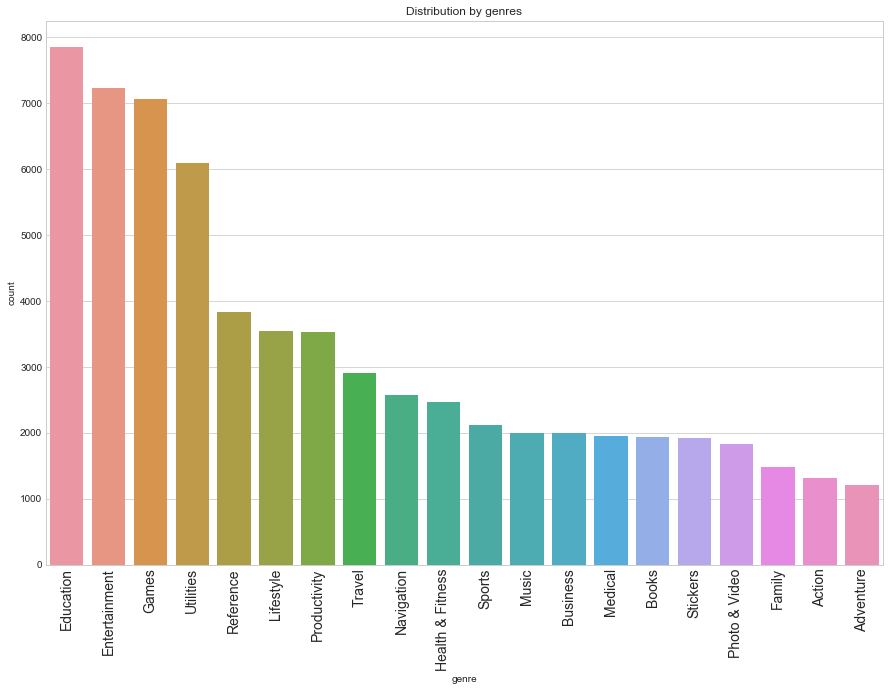

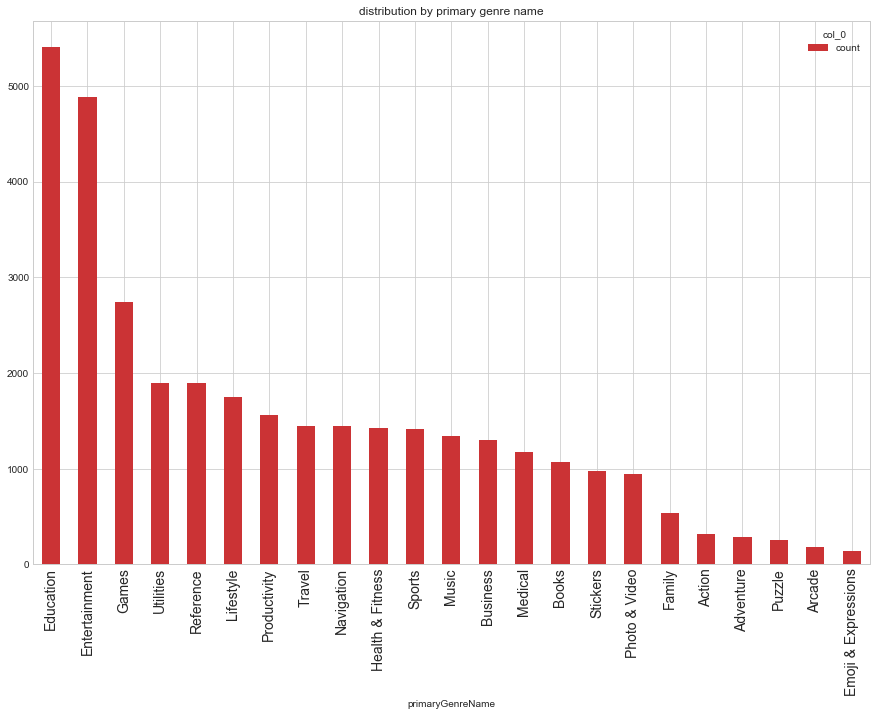

In [34]:
generateGenreSummary(df[df.price > 0])

**Summary:**
 - Games are most popular genre, followed by Entertainment and lifestyle;
 - PrimaryGenre seems to show same trend as that of Genres list;
 - It'd be interesting to see what genres are frequently found with others;
 - **for paid apps** the trend shifted more towards `Education` being the genre with highest population followed by `Entertainment` and `Games`; Note that `Education` occupied 4th position in over all category;
 - Here are **top 10** in both categories:
 
 
 |   #   | All Apps | Paid Apps |
 |-------|----------|-----------|
 |   1   | **Games**    | **Education** |
 | 2     | Entertainment | Entertainment |
 | 3     | Lifestyle | **Games** |
 | 4     | **Education** | Utilities |
 | 5     | Business | Reference |
 | 6   |    Utilities | Lifestyle |
 | 7     | Productivity | Productivity |
 | 8     | Sports | Travel |
 | 9     | Reference | Navigation |
 | 10     | Health & Fitness | Health & Fitness |
 
## Distribution by advisories

### Introduction
**What does this property indicate?**
[TO BE DONE]


In [38]:
def generateAdvisorySummary(_df):
    advisories = {}
    advisoriesNAFor = 0
    
    for advisoriesString in _df.advisories.values:
        ads = json.loads(advisoriesString)
        
        if len(ads) == 0:
            advisoriesNAFor += 1
        
        for a in ads:
            if a not in advisories:
                advisories[a] = 0
            advisories[a] = advisories[a] + 1
    
    adf = pd.DataFrame([[k,v] for k,v in advisories.items()], columns=['advisory', 'count']).sort_values(['count'], ascending=False)
    
    
    print ("\n Advisories not available for %d apps (%0.3f %%)" % (advisoriesNAFor, (100 * advisoriesNAFor / _df.shape[0])))
    print ("\n Top 10 advisories used")
    print (adf.head(10))
    
    plt.figure(figsize=(10, 5))
    fx = sns.barplot(x='advisory', y='count', data=adf)
    fx.set_xticklabels(rotation=90, labels=adf['advisory'], size=14)
    plt.title("Distribution by advisory")


 Advisories not available for 247994 apps (76.206 %)

 Top 10 advisories used
                                             advisory  count
2                             Unrestricted Web Access  17518
7         Infrequent/Mild Cartoon or Fantasy Violence  15510
0            Infrequent/Mild Mature/Suggestive Themes  14720
5   Infrequent/Mild Alcohol, Tobacco, or Drug Use ...  13828
11           Infrequent/Mild Profanity or Crude Humor  11434
13          Infrequent/Mild Sexual Content and Nudity   9936
4       Infrequent/Mild Medical/Treatment Information   9460
15                 Infrequent/Mild Realistic Violence   9387
19                 Infrequent/Mild Horror/Fear Themes   7611
12          Frequent/Intense Mature/Suggestive Themes   6205


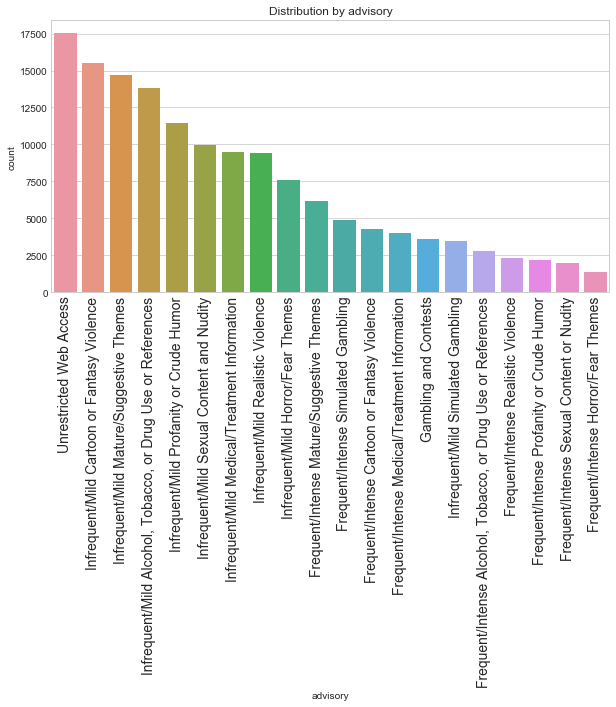

In [41]:
generateAdvisorySummary(df)

#### For paid apps


 Advisories not available for 27707 apps (80.609 %)

 Top 10 advisories used
                                             advisory  count
7         Infrequent/Mild Cartoon or Fantasy Violence   1547
0            Infrequent/Mild Mature/Suggestive Themes   1454
4   Infrequent/Mild Alcohol, Tobacco, or Drug Use ...   1179
11           Infrequent/Mild Profanity or Crude Humor    944
2                             Unrestricted Web Access    930
1       Infrequent/Mild Medical/Treatment Information    909
17                 Infrequent/Mild Realistic Violence    837
19                 Infrequent/Mild Horror/Fear Themes    784
13          Infrequent/Mild Sexual Content and Nudity    690
14     Frequent/Intense Medical/Treatment Information    531


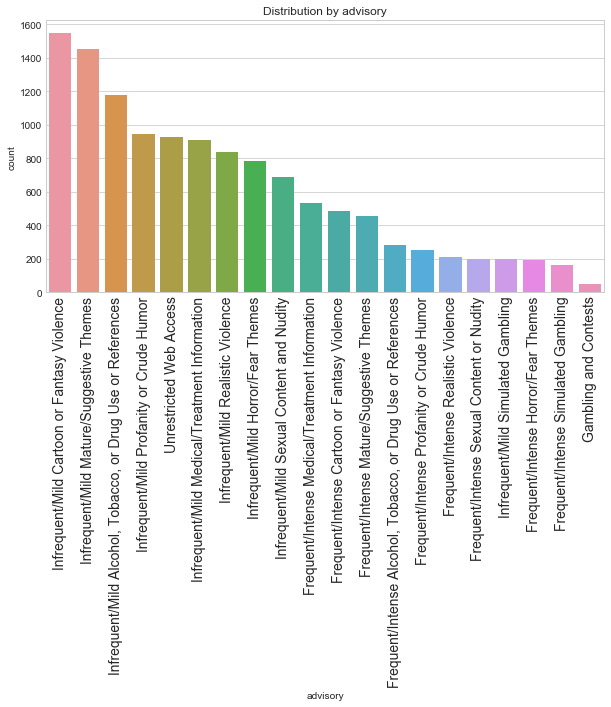

In [43]:
generateAdvisorySummary(df[df.price > 0])

#### For Free Apps


 Advisories not available for 220287 apps (75.686 %)

 Top 10 advisories used
                                             advisory  count
2                             Unrestricted Web Access  16588
7         Infrequent/Mild Cartoon or Fantasy Violence  13963
0            Infrequent/Mild Mature/Suggestive Themes  13266
5   Infrequent/Mild Alcohol, Tobacco, or Drug Use ...  12649
11           Infrequent/Mild Profanity or Crude Humor  10490
13          Infrequent/Mild Sexual Content and Nudity   9246
4       Infrequent/Mild Medical/Treatment Information   8551
15                 Infrequent/Mild Realistic Violence   8550
19                 Infrequent/Mild Horror/Fear Themes   6827
12          Frequent/Intense Mature/Suggestive Themes   5747


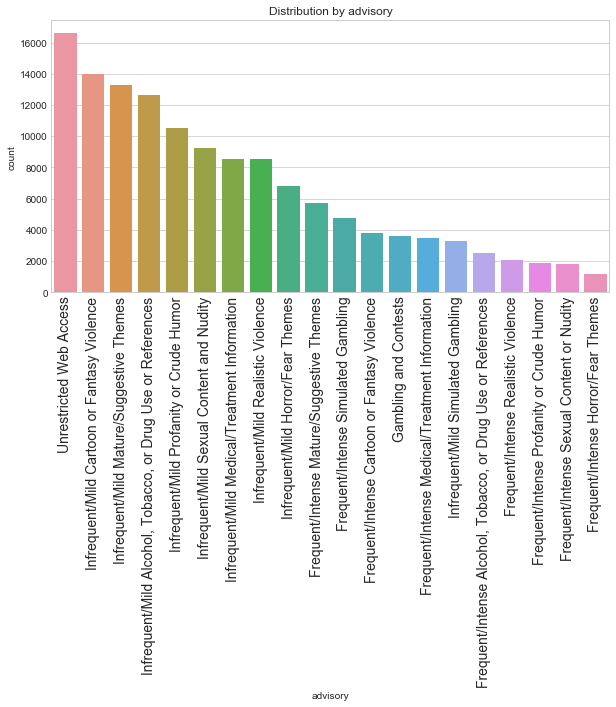

In [47]:
generateAdvisorySummary(df[df.price == 0])

#### Genre distribution for apps where advisory is available

c:\users\minhazv\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.



Top 10 Genres by distribution
               genre  count
40     Entertainment   2201
39             Games   2146
10           Medical   1068
21         Education    938
17            Action    748
29  Health & Fitness    748
11         Lifestyle    729
7          Adventure    705
47         Reference    700
44         Utilities    682

distribution of primary genre in percentage
Games                29.602401
Medical              12.813203
Entertainment         9.197299
Education             7.066767
Reference             4.606152
Stickers              4.606152
Health & Fitness      4.471118
Utilities             3.840960
Lifestyle             3.450863
Sports                3.120780
Book                  2.490623
Productivity          2.295574
Music                 1.980495
Travel                1.935484
Photo & Video         1.770443
Food & Drink          1.590398
Social Networking     1.485371
News                  1.110278
Business              1.080270
Navigation            0.480

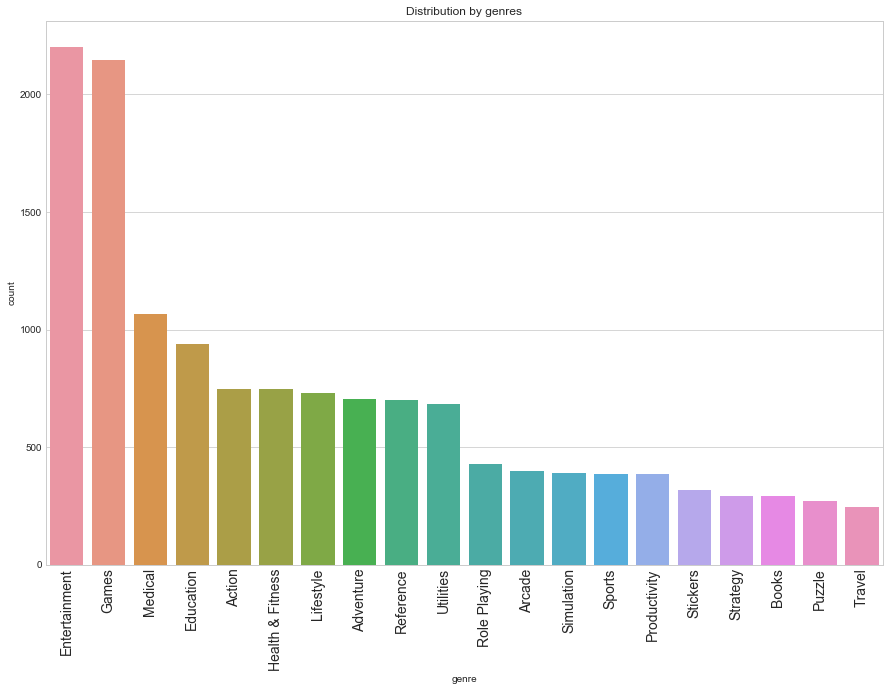

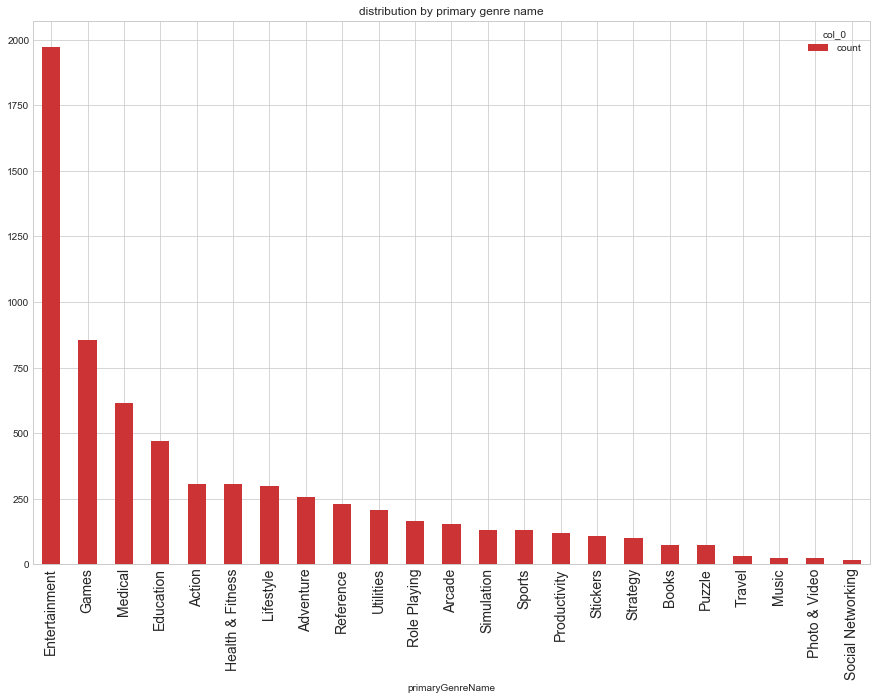

In [48]:
generateGenreSummary(df[df.advisories != "[]"][df.price > 0])

**Summary**
 - I'm not sure if I have been looking at this property before installing an App or Game; Also, this information is not available for `76.21%` in case of all applications and `80.61%` in case of paid applications;
 
- Though there is a suggestive difference between first position held in case of free apps and paid apps: For free apps it's ` Unrestricted Web Access` which is assentially required by all application these days; while for paid apps it's `Infrequent/Mild Cartoon or Fantasy Violence` indicating games or entertainment genre?

- In the end, I generated summary for **`genre`** property for **`paid apps`** for which the advisory info is available, to strengthen the belief that, most of them belonged to `Entertainment` or `Games` genre;

## Distribution by contentAdvisoryRating

#### Introduction
This property indicates the age group for which the app is made for

In [50]:
def generateCARSummary(_df):
    print ("Distribution by count")
    print (_df.contentAdvisoryRating.value_counts())
    print ()
    print ("Normalized distribution in %")
    print (_df.contentAdvisoryRating.value_counts(normalize =True) * 100)

    _ct = pd.crosstab(_df.contentAdvisoryRating, "count")
    _ct.plot(kind="pie", subplots=True)
    _ct.plot(kind="bar")

#### All applications

Distribution by count
4+               247982
17+               33675
12+               31243
9+                12514
Not yet rated        12
Name: contentAdvisoryRating, dtype: int64

Normalized distribution in %
4+               76.202270
17+              10.347975
12+               9.600647
9+                3.845421
Not yet rated     0.003687
Name: contentAdvisoryRating, dtype: float64


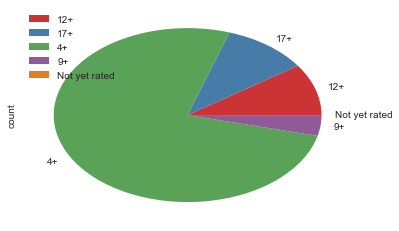

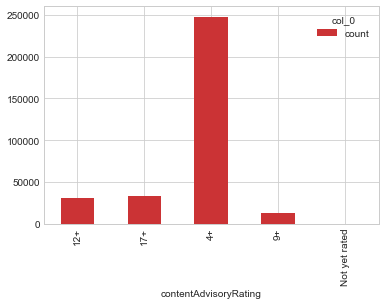

In [53]:
generateCARSummary(df)

#### Paid applications

Distribution by count
4+     27707
12+     2856
17+     2261
9+      1548
Name: contentAdvisoryRating, dtype: int64

Normalized distribution in %
4+     80.609217
12+     8.309089
17+     6.578029
9+      4.503666
Name: contentAdvisoryRating, dtype: float64


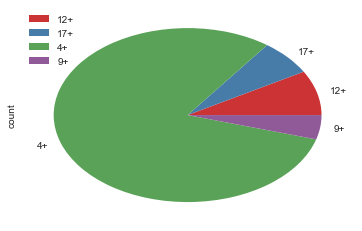

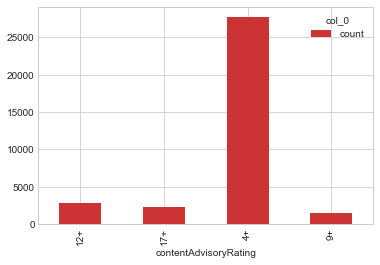

In [54]:
generateCARSummary(df[df.price > 0])

#### Free applications

Distribution by count
4+               220275
17+               31414
12+               28387
9+                10966
Not yet rated        12
Name: contentAdvisoryRating, dtype: int64

Normalized distribution in %
4+               75.681832
17+              10.793186
12+               9.753173
9+                3.767686
Not yet rated     0.004123
Name: contentAdvisoryRating, dtype: float64


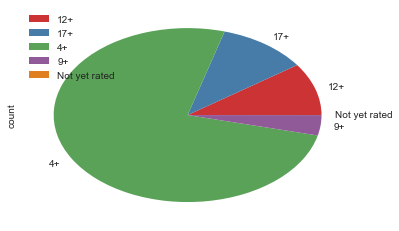

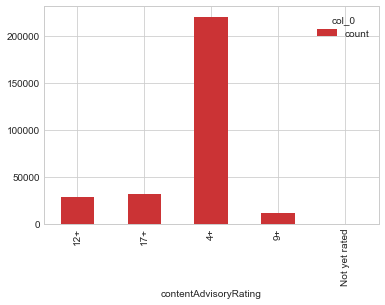

In [55]:
generateCARSummary(df[df.price == 0])

**Summary**:
 - Both free and paid apps show similar distribution; **`4+`** is the content advisory rating for majority of applications;
 - There is a difference in 2nd and 3rd position: for paid apps - it's `12+` followed by `17+` with just `~2%` difference in distribution while for free apps - it's `17+` followed by `12+` with a margin of `~1%` population; 
 - In our dataset around `12 applications` were found to be `Not Yet Rated`
 
 
## Distribution by fileSizeInMB

#### Introduction
This doesn't seem to be a very important feature, but let's look at the properties FWIW

In [67]:
def generateFileSizeSummary(_df):
    meanSize = _df.fileSizeInMB.mean()
    medianSize = _df.fileSizeInMB.median()
    
    print (_df.fileSizeInMB.describe())


    print ("\nAverage file size in MD: %0.2f " % (meanSize))
    print ("Median file size in MD: %0.2f " % (medianSize))

#### All applications

In [68]:
generateFileSizeSummary(df)

count    325426.000000
mean         58.099386
std         118.399677
min           0.026874
25%          13.107422
50%          29.831055
75%          63.456055
max        3840.435547
Name: fileSizeInMB, dtype: float64

Average file size in MD: 58.10 
Median file size in MD: 29.83 


#### Paid applications

In [69]:
generateFileSizeSummary(df[df.price != 0])

count    34372.000000
mean        79.317169
std        205.924198
min          0.026874
25%          8.125244
50%         23.519531
75%         65.503906
max       3840.435547
Name: fileSizeInMB, dtype: float64

Average file size in MD: 79.32 
Median file size in MD: 23.52 


#### Free applications

In [71]:
generateFileSizeSummary(df[df.price == 0])

count    291054.000000
mean         55.593674
std         102.989786
min           0.029853
25%          13.722695
50%          30.503906
75%          63.324219
max        3741.464844
Name: fileSizeInMB, dtype: float64

Average file size in MD: 55.59 
Median file size in MD: 30.50 


#### let's look at smallest 20 apps in size; `< 100 KB` size

In [76]:
_df = df[df.fileSizeInMB < 0.1].sort_values(['fileSizeInMB'])

_df.head(20)[['trackName', 'fileSizeInMB', 'averageUserRating', 'avgUserRatingCV', 'artist', 'primaryGenreName']]

,trackName,fileSizeInMB,averageUserRating,avgUserRatingCV,artist,primaryGenreName
220846,Weight Conversion,0.026874,3.0,3.0,Zestech,Health & Fitness
9519,Interpolation Calculator,0.029005,2.5,3.0,PunkStar Studios,Utilities
230695,Ohm's Law Calculator,0.029560,3.5,3.5,George Balla,Utilities
233239,ColorLight,0.029853,3.0,3.0,Christian Stahl,Utilities
232934,Anonymous Web Browser with Blackout,0.030097,3.0,3.0,Paul Abraham Jaimovich,Social Networking
268297,Phonetic Alphabet Viewer,0.030736,2.5,2.5,Nate Glenn,Reference
254411,Mail Translator,0.031033,3.0,3.0,Piet Jonas,Productivity
165944,CP Point Me,0.031351,null,null,Wachawee Phuetphan,Navigation
119938,Contact Grouper,0.031816,2.5,2.5,Jean Shilinski,Utilities
124390,iEyes,0.032066,2.5,2.5,Andreas Schmidt,Entertainment


**Summary**:
 - Paid applications are bigger on average as compared to free applications
 - Both paid and free apps have max size of around `3.7GB` in their population and a min size of around `26KB`
 - Apps with small size (<100KB) seem to have poor rating and rating count, mostly utilities; We will have better numbers when we do multi variate analysis and look for correlation between file size and other properties
 
## Distribution by price


In [99]:
print ("All apps")
print (df.price.describe())

print ("\nPaid apps")
print (df[df.price > 0].price.describe())

print ("\n No of apps priced at 0.99 USD: %d" % df[df.price == 0.99].shape[0])

print ("\n Percentage of paid apps to all apps in dataset: %0.3f %%" % (df[df.price != 0].shape[0] / df.shape[0] * 100))

All apps
count    325426.000000
mean          0.516794
std           5.849956
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         999.990000
Name: price, dtype: float64

Paid apps
count    34372.000000
mean         4.892886
std         17.395455
min          0.990000
25%          0.990000
50%          1.990000
75%          3.990000
max        999.990000
Name: price, dtype: float64

 No of apps priced at 0.99 USD: 12186

 Percentage of paid apps to all apps in dataset: 10.562 %


### Price distribution per genre

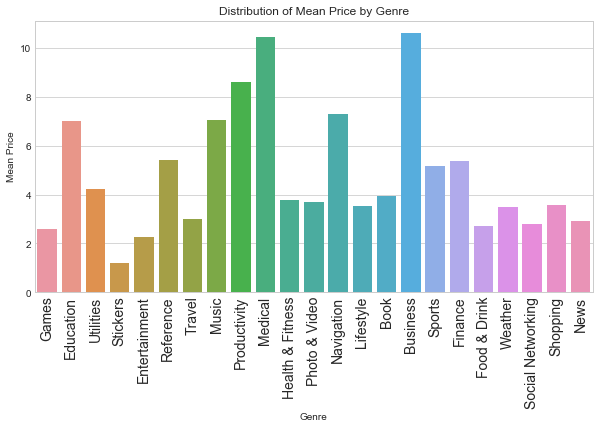

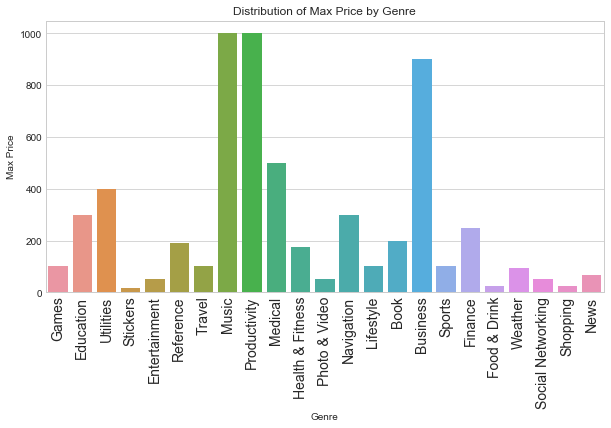

In [145]:
_df = df[df.price != 0]
data = []

for genre in _df.primaryGenreName.value_counts().index:
    data.append([
        genre,
        _df[_df.primaryGenreName == genre].price.mean(),
        _df[_df.primaryGenreName == genre].price.median(),
        _df[_df.primaryGenreName == genre].price.max(),
        _df[_df.primaryGenreName == genre].price.min(),
        _df[_df.primaryGenreName == genre].shape[0]])
    
__df = pd.DataFrame(data, columns=['Genre', 'Mean Price', 'Median Price', 'Max Price', 'Min Price', 'Count'])

plt.figure(figsize=(10, 5))
fx = sns.barplot(x='Genre', y='Mean Price', data=__df)
plt.title("Distribution of Mean Price by Genre")
fx.set_xticklabels(rotation=90, labels=__df['Genre'], size=14)

plt.figure(figsize=(10, 5))
fx = sns.barplot(x='Genre', y='Max Price', data=__df)
fx.set_xticklabels(rotation=90, labels=__df['Genre'], size=14)
plt.title("Distribution of Max Price by Genre")

In [147]:
__df.sort_values(["Mean Price"], ascending=False).head(10)

,Genre,Mean Price,Median Price,Max Price,Min Price,Count
15,Business,10.598384,3.99,899.99,0.99,978
9,Medical,10.473122,3.99,499.99,0.99,1422
8,Productivity,8.615346,2.99,999.99,0.99,1444
12,Navigation,7.288313,4.99,299.99,0.99,1304
7,Music,7.061182,2.99,999.99,0.99,1447
1,Education,7.027705,2.99,299.99,0.99,4880
5,Reference,5.425006,2.99,189.99,0.99,1754
17,Finance,5.360301,1.99,249.99,0.99,532
16,Sports,5.191485,1.99,99.99,0.99,943
2,Utilities,4.249840,1.99,399.99,0.99,2744


In [154]:
print ("Top Most Expensive Music Apps")
df[df.primaryGenreName == 'Music'].sort_values(['price'], ascending=False).head(10)[['trackName', 'price']]

Top Most Expensive Music Apps


,trackName,price
321105,CyberTuner,999.99
253917,FLSM,899.99
135209,Verituner,599.99
143830,Transfer Function,49.99
322948,Room Impulse Response,49.99
115985,K Music Player HiEnd Ultimate,49.99
92636,Peter Vogel CMI Pro,49.99
143797,iRemote for Smaart 7 by Studio Six Digital,49.99
143762,SmaartTools Single Channel RTA,49.99
150689,ProRemote,42.99


**Summary**
 - In the dataset only `10.562 %` of apps were found to be paid, absolute count being: `34372`
 - Amongst all apps, Expectation of price of an app would be `0.52 USD` and it would be around `4.89 USD` amongst paid apps;
 - The most expensive app in the dataset is priced at `999 USD` while least expensive one is `0.99 USD`
 - There is a high standard deviation amongst paid apps, showing large variation in price: it can be seen that per quarter average price is `[0.99 USD, 1.99USD, 2.99USD, 12.29 USD]` that means morethan 75% population is priced below `2.99 USD`
 - Interestingly around `12,186 apps` in dataset are priced at `0.99 USD`
 - Highest Average Price was found in `Business`, `Medical`, `Productivity`, `Navigation`, `Music` & `Education` in decreasing order; Music seemed an odd one out here - but it was apparently due to some expensive tuner apps and couple of `49.99 USD` music pro apps;
 - In case of education there are around `25 apps with price >= 100 USD`

# Multivariate Analysis


## Correlation between
 - FileSize vs Price, User Rating, User Rating Count
 - User Rating , User Rating Count and Price

## Distributions
 - Rating, Rating Count, average price and size per main genres